In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import expon, norm, lognorm, gamma, beta, weibull_min, uniform, poisson, chi2
import seaborn as sns

from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { margin-left: -45% !important; margin-right: -45% !important; }</style>"))

In [91]:
def show_histogram(title, data, bins_count):
    # Plot the distribution of 'start' datetime with 1000 bins
    plt.figure(figsize=(20, 6))
  
    # Plot the histogram of the 'start' dates with 1000 bins
    plt.hist(data, bins=bins_count, edgecolor='k', alpha=0.7)
    plt.title(f'{title} - Distribution of Start Dates ({bins_count} bins)')
    plt.xlabel('Start Date')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


In [92]:
# Load the dataset
file_path = 'job_flow_total(task,flavor,single).csv'
data = pd.read_csv(file_path)

# Convert 'start' and 'finish' to datetime
data['start'] = pd.to_datetime(data['start'])
data['finish'] = pd.to_datetime(data['finish'])
data['time_diff'] = pd.to_timedelta(data['time_diff'])

data

,pod_name,pod_type,project,namespace,user_team,start,finish,count,time_diff,computing_load,gpu_utilization,flavor,preemption
0,run-pipeline-gpu-9fg4g-4198045470,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-11-08 12:15:00+00:00,2023-12-16 00:45:00+00:00,4,37 days 12:30:00,5,97.469773,A100,y
1,run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 02:15:00+00:00,8,13 days 14:00:00,5,93.878238,A100,y
2,run-pipeline-gpu-qr2fk-3879037461,task,PROJECT_5,ns-1690440796148727,NaN,2023-11-08 12:15:00+00:00,2023-11-13 00:15:00+00:00,1,4 days 12:00:00,4,67.799001,A100,y
3,run-pipeline-gpu-cqxgz-1528876722,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-11-08 12:15:00+00:00,2023-11-27 07:30:00+00:00,16,18 days 19:15:00,3,53.086390,A100,y
4,run-pipeline-gpu-8z2pg-3801962406,task,PROJECT_1,ns-16904458533318198,TEAM_2,2023-11-08 12:15:00+00:00,2023-11-09 09:15:00+00:00,2,0 days 21:00:00,5,95.259751,A30,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,instance-2141-0,instance,PROJECT_14,ns-1693886715473508,TEAM_6,2023-12-01 09:00:00+00:00,2023-12-02 09:00:00+00:00,1,1 days 00:00:00,1,0.000000,A30,n
905,instance-2220-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-08 08:30:00+00:00,2023-12-09 08:30:00+00:00,1,1 days 00:00:00,1,0.000000,A30,n
906,instance-2260-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-18 10:00:00+00:00,2023-12-18 10:15:00+00:00,1,0 days 00:15:00,1,0.000000,A30,y
907,instance-2142-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-20 00:30:00+00:00,2023-12-21 00:30:00+00:00,1,1 days 00:00:00,1,0.352398,A30,y


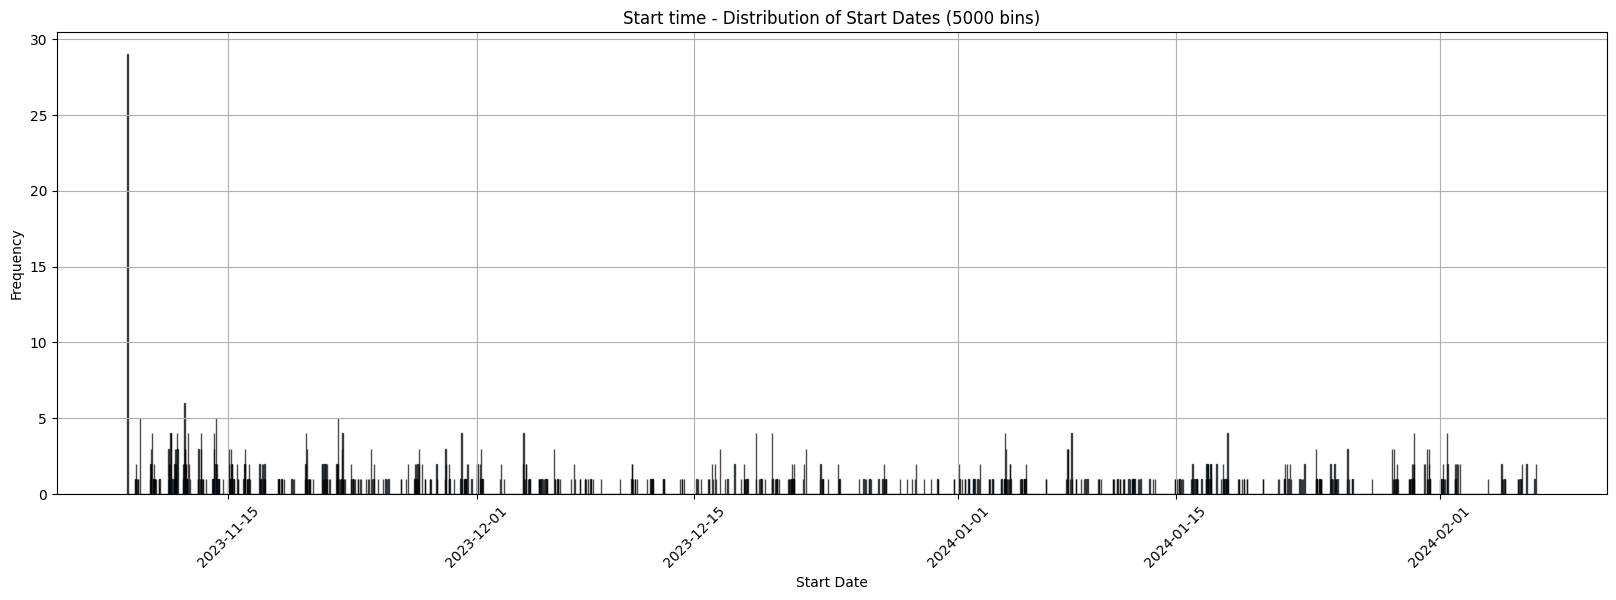

In [93]:
show_histogram("Start time", data['start'], 5000)

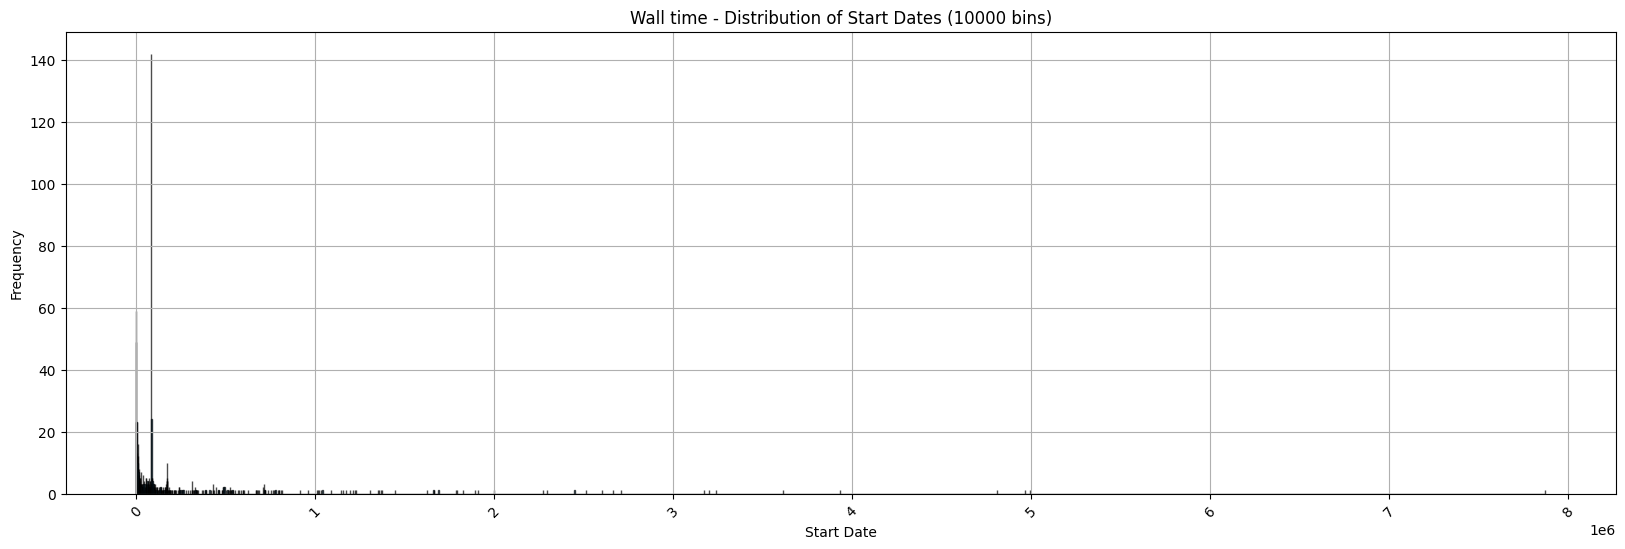

In [99]:
time_diff_data = data['time_diff'].apply(lambda x: pd.to_timedelta(x).total_seconds())
time_diff_data_nonzero = time_diff_data[time_diff_data != 0]
show_histogram("Wall time", time_diff_data_nonzero, 10000)

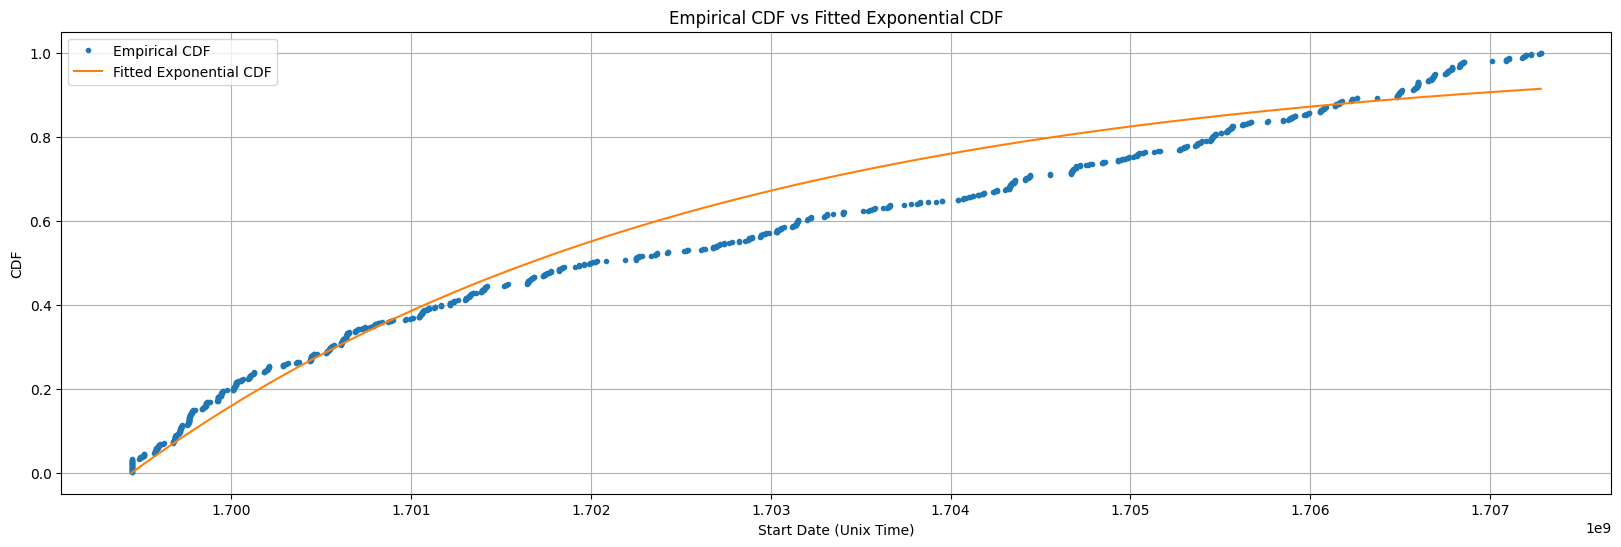

In [31]:
data['start'] = pd.to_datetime(data['start'])
start_data = data['start'].astype(int) / 10**9  # Convert to seconds for normal distribution fitting

# Fit the exponential distribution to the data
params = stats.expon.fit(start_data)

# Generate data from the fitted exponential distribution
fitted_data = stats.expon.rvs(*params, size=len(start_data))

# Empirical CDF
ecdf = np.arange(1, len(start_data) + 1) / len(start_data)
sorted_start_data = np.sort(start_data)

# Fitted exponential CDF
fitted_cdf = stats.expon.cdf(sorted_start_data, *params)

# Plot the empirical CDF and fitted exponential CDF
plt.figure(figsize=(20, 6))
plt.plot(sorted_start_data, ecdf, marker='.', linestyle='none', label='Empirical CDF')
plt.plot(sorted_start_data, fitted_cdf, linestyle='-', label='Fitted Exponential CDF')
plt.title('Empirical CDF vs Fitted Exponential CDF')
plt.xlabel('Start Date (Unix Time)')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()


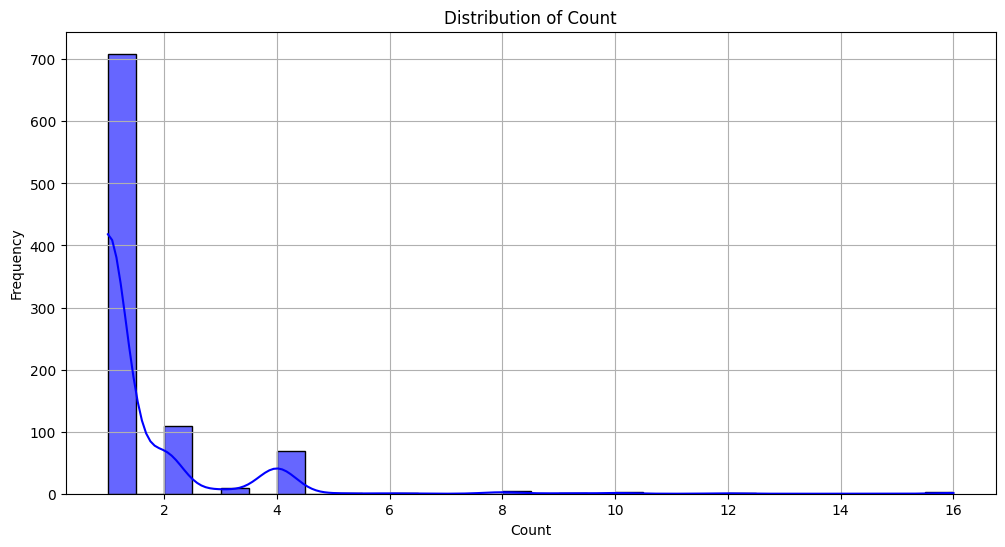

/home/mystous/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/mystous/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:723: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


,KS Statistic,p-value
norm,0.422749,7.734992e-148
lognorm,0.482273,4.553923e-195
poisson,0.563178,1.742177e-272
expon,0.779978,0.000000e+00
gamma,0.777065,0.000000e+00
beta,0.778136,0.000000e+00
weibull_min,0.779978,0.000000e+00
uniform,0.833223,0.000000e+00
chi2,0.779978,0.000000e+00


In [24]:
count_data = data['count']

# Plot histogram to visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(count_data, bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# List of distributions to test
distributions = {
    'expon': expon,
    'norm': norm,
    'lognorm': lognorm,
    'gamma': gamma,
    'beta': beta,
    'weibull_min': weibull_min,
    'uniform': uniform,
    'poisson': poisson,
    'chi2': chi2
}

# Fit the data to each distribution and perform the KS test
results = {}
for dist_name, dist in distributions.items():
    try:
        if dist_name == 'poisson':
            # Poisson distribution requires the mean (lambda)
            params = (count_data.mean(),)
        else:
            params = dist.fit(count_data)
        
        ks_stat, p_value = stats.kstest(count_data, dist_name, args=params)
        results[dist_name] = (ks_stat, p_value)
    except Exception as e:
        results[dist_name] = (None, None, str(e))

# Display the results
results_df = pd.DataFrame(results, index=['KS Statistic', 'p-value']).T
results_df_sorted = results_df.sort_values(by='p-value', ascending=False)

# Display the sorted results
results_df_sorted

In [22]:
!pip3 install ace_tools

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement ace_tools (from versions: none)
ERROR: No matching distribution found for ace_tools
